# **Telecom Churn Analysis**

In [ ]:
# **Tony Lentini**

## **Problem Definition**

 - I see firsthand the importance and impact of churn in telecom. This has become an important area for telecom providers, as it costs more to attract new customers than to retain existing ones.

### **The objective:**

 - Uncover common characteristics and correlations of customers who have already churned.


------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. Customer: Unique Customer Identification.
2. Gender: The gender of the customer.
3. SeniorCitizen: Customer is 65 or older.
4. Partner: If the customer is married / partnered.
5. Dependents: If the customer lives with any dependents.
6. Tenure: The total amount of months that the customer has been with the company.
7. PhoneService: If the customer subscribes to home phone service with the company.
8. MultipleLines: If the customer subscribes to multiple telephone lines.
9. InternetService: If the customer subscribes to Internet service with the company.
10. OnlineSecurity: If the customer subscribes to an additional online security service provided by the company.
11. OnlineBackup: If the customer subscribes to an additional online backup service provided by the company.
12. DeviceProtection: If the customer subscribes to additional device protection plan for Internet equipment provided by the 
company
13. TechSupport: If the customer subscribes to an additional technical support plan from the company.
143.StreamingTV: If the customer uses their Internet service to stream television programing from a third party provider.
15. StreamingMovies: If the customer uses their Internet service to stream movies from a third party provider.
16. Contract: The customer’s current contract type.
17. PaperlessBilling: If the customer has chosen paperless billing.
18. PaymentMethod: How the customer pays their bill.
19. MonthlyCharges: The customer’s current total monthly charge for all their services.
20. TotalCharges: The customer’s total charges, calculated to the end of the quarter.
21. Churn: If the customer left the company..

### **Loading Libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
!pip install yellowbrick

### **Load the data**

In [3]:
# loading the dataset
data = pd.read_csv("C:/Users/t_len/OneDrive/Documents/_Colorado State Univ/13 MIS_581/Telco_Customer_Churn2.csv")


### **Check the shape of the data**

In [4]:
# Print the shape of the data
data.shape

(7043, 21)

#### **Observations and Insights: **
The shape tells us the dimensions of our dataset. It returns a tuple with the number of Rows and Columns in our dataset. 
This is a good first step when working with a new dataset for analysis, as it tells us something about the volume of data
we are dealing with. In this case we now know there are 21 variables (Columns) and 7043 Rows. 

### **Understand the data by observing a few rows**

In [5]:
# View first 10 rows
# The head() method returns the first x rows (5 is the default if no number is specified) starting from the top of the dataset. 
# Given we have a significant amount of rows in our dataset, I will set this to return the first 25 rows. 
# This gives the Data Analyst a general idea of what the data looks like and the basic structure. 

data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,0,0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,1,1,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,1,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,0,0,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,1,1,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,0,0,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [12]:
# View last 10 rows Hint: Use tail() method
# The tail() method returns the last x rows (5 is the default if no number is specified) starting from the bottom of the dataset. 
# Given we have a significant amount of rows in our dataset, I will set this to return the first 25 rows. 

data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,0,0,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,0
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,1,0,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,1,0,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,0
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,1,1,One year,No,Electronic check,60.65,743.30,0
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,0,0,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,1,1,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,0,0,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,1,1,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


### **Check the data types and and missing values of each column** 

In [7]:
# Check the datatypes of each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Check the TotalCharges variable for uniqueness

print(data["TotalCharges"].unique())

[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [9]:
# Find the percentage of missing values in each column of the data
data.isnull().sum() / data.shape[0] * 100.00

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

## **Exploratory Data Analysis**

### **Explore the summary statistics of numerical variables**

In [10]:
# Explore basic summary statistics of numeric variables. 
# "Summary Statistics" are descriptive statistics about the data in our dataset.
data[["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]].describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
data[["Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup"]].describe()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
count,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,3,3,3,3
top,No,No,Yes,No,Fiber optic,No,No
freq,3641,4933,6361,3390,3096,3498,3088


In [12]:
data[["DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]].describe()

,StreamingTV,StreamingMovies,Churn
count,7043.000000,7043.000000,7043.000000
mean,0.384353,0.387903,0.265370
std,0.486477,0.487307,0.441561
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


### **Explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [13]:
# List of the categorical columns in the data

cols = ["gender", "Dependents", "Partner", "PhoneService",  "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

**Number of unique observations in each category**

In [14]:
for column in cols:
    print("*" * 75)
    print("The Unique Values in the", column, "Variable are :")
    print(data[column].unique())
    
print("*" * 75)

***************************************************************************
The Unique Values in the gender Variable are :
['Female' 'Male']
***************************************************************************
The Unique Values in the Dependents Variable are :
['No' 'Yes']
***************************************************************************
The Unique Values in the Partner Variable are :
['Yes' 'No']
***************************************************************************
The Unique Values in the PhoneService Variable are :
['No' 'Yes']
***************************************************************************
The Unique Values in the MultipleLines Variable are :
['No phone service' 'No' 'Yes']
***************************************************************************
The Unique Values in the InternetService Variable are :
['DSL' 'Fiber optic' 'No']
***************************************************************************
The Unique Values in the OnlineSecurity Var

## **2. Univariate analysis - Categorical Data**

A function that will help create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [15]:
#################################################################################
# Chi Squared Test (run once for each variable within the hypotheses) 
#################################################################################
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.DataFrame(data)
f = pd.DataFrame(data)

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['Churn'], df['Contract'])

# Perform the Chi-Squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Chrun and Contract (reject null hypothesis of independence).")
else:
    print("There is no significant association between Churn and Contract (fail to reject null hypothesis of independence).")

Chi-Squared Statistic: 1184.5965720837926
P-value: 5.863038300673391e-258
Degrees of Freedom: 2
Expected Frequencies:
 [[2846.69175067 1082.11018032 1245.198069  ]
 [1028.30824933  390.88981968  449.801931  ]]
There is a significant association between Chrun and Contract (reject null hypothesis of independence).


## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

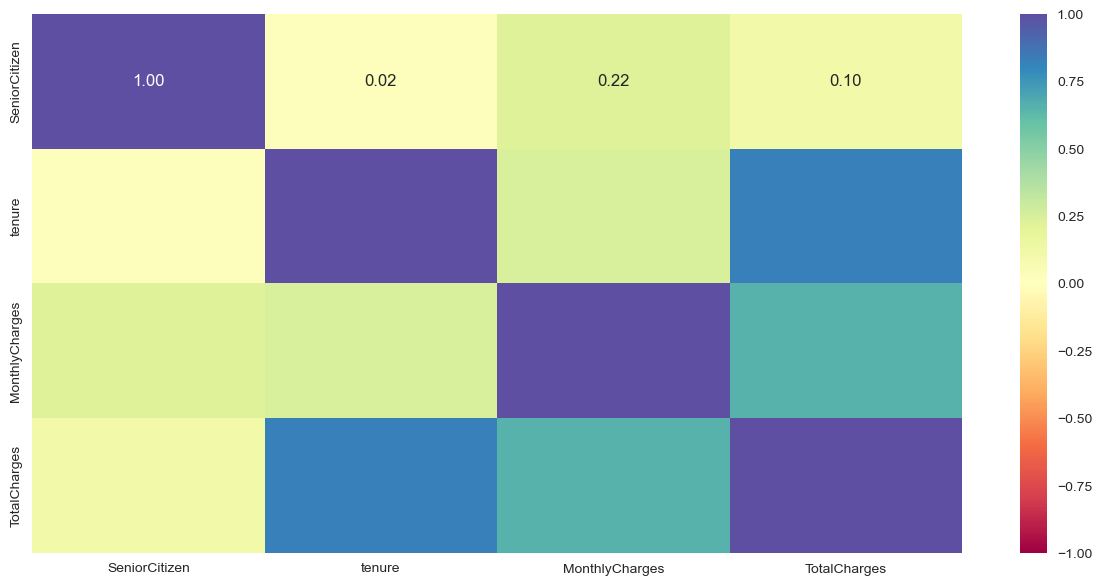

In [21]:
plt.figure(figsize = (15, 7))
num_cols = data.select_dtypes(include = "number").columns.to_list()
sns.heatmap(data[num_cols].corr(), annot = True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()